# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4"

DATE= f'2022-04-10_02-36-21'

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/{DATE}/figuras"):
    os.makedirs(f"{PATH}/{DATE}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/{DATE}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,10/04/2022_02:36:24,473,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.63,55.75,46.94,54.50,44.63,Prendido
1,10/04/2022_02:36:30,462,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.56,55.75,46.94,54.56,44.56,Prendido
2,10/04/2022_02:36:36,451,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.56,55.75,46.94,54.69,44.56,Prendido
3,10/04/2022_02:36:42,450,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.56,55.75,46.94,54.69,44.56,Prendido
4,10/04/2022_02:36:48,449,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.56,55.75,46.94,54.69,44.56,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10/04/2022_02:45:42,488,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.50,55.44,47.13,53.56,43.25,Prendido
96,10/04/2022_02:45:48,487,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.44,55.44,47.13,53.56,43.19,Prendido
97,10/04/2022_02:45:53,487,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.50,55.44,47.13,53.44,43.25,Prendido
98,10/04/2022_02:45:59,487,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,60.44,55.44,47.13,53.56,43.19,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    print(t)
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)

10/04/2022_02:36:24


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(f'{PATH}/{DATE}'):
    if file.endswith(".csv"):
        n += 1

print(n)

125


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/{DATE}/data_{i}.csv")

    # CO2
    
    # Con este loop cambiamos cualquier tipo de error en la medicion de co2 a -1
    co2_column = df["CO2"].to_numpy()
    for i in range(len(co2_column)):
        # Chequeamos que la celda sea un str y que sea mas larga que 4, ya que el sensor solo mide hasta 5000
        if type(co2_column[i]) is str and len(co2_column[i]) > 4:
            co2_column[i] = -1

    co2 = np.concatenate((co2, np.transpose(co2_column)))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

10/04/2022_02:36:24
10/04/2022_02:36:30
10/04/2022_02:36:36
10/04/2022_02:36:42
10/04/2022_02:36:48
10/04/2022_02:36:53
10/04/2022_02:36:59
10/04/2022_02:37:05
10/04/2022_02:37:11
10/04/2022_02:37:17
10/04/2022_02:37:23
10/04/2022_02:37:29
10/04/2022_02:37:35
10/04/2022_02:37:40
10/04/2022_02:37:46
10/04/2022_02:37:52
10/04/2022_02:37:58
10/04/2022_02:38:04
10/04/2022_02:38:10
10/04/2022_02:38:16
10/04/2022_02:38:22
10/04/2022_02:38:27
10/04/2022_02:38:33
10/04/2022_02:38:39
10/04/2022_02:38:45
10/04/2022_02:38:51
10/04/2022_02:38:57
10/04/2022_02:39:03
10/04/2022_02:39:08
10/04/2022_02:39:14
10/04/2022_02:39:20
10/04/2022_02:39:26
10/04/2022_02:39:32
10/04/2022_02:39:38
10/04/2022_02:39:44
10/04/2022_02:39:50
10/04/2022_02:39:55
10/04/2022_02:40:01
10/04/2022_02:40:07
10/04/2022_02:40:13
10/04/2022_02:40:19
10/04/2022_02:40:25
10/04/2022_02:40:31
10/04/2022_02:40:37
10/04/2022_02:40:42
10/04/2022_02:40:48
10/04/2022_02:40:54
10/04/2022_02:41:00
10/04/2022_02:41:06
10/04/2022_02:41:12


10/04/2022_03:18:39
10/04/2022_03:18:45
10/04/2022_03:18:51
10/04/2022_03:18:57
10/04/2022_03:19:03
10/04/2022_03:19:08
10/04/2022_03:19:14
10/04/2022_03:19:20
10/04/2022_03:19:26
10/04/2022_03:19:32
10/04/2022_03:19:38
10/04/2022_03:19:44
10/04/2022_03:19:50
10/04/2022_03:19:55
10/04/2022_03:20:01
10/04/2022_03:20:07
10/04/2022_03:20:13
10/04/2022_03:20:19
10/04/2022_03:20:25
10/04/2022_03:20:31
10/04/2022_03:20:37
10/04/2022_03:20:42
10/04/2022_03:20:48
10/04/2022_03:20:54
10/04/2022_03:21:00
10/04/2022_03:21:06
10/04/2022_03:21:12
10/04/2022_03:21:18
10/04/2022_03:21:23
10/04/2022_03:21:29
10/04/2022_03:21:35
10/04/2022_03:21:41
10/04/2022_03:21:47
10/04/2022_03:21:53
10/04/2022_03:21:59
10/04/2022_03:22:05
10/04/2022_03:22:10
10/04/2022_03:22:16
10/04/2022_03:22:22
10/04/2022_03:22:28
10/04/2022_03:22:34
10/04/2022_03:22:40
10/04/2022_03:22:46
10/04/2022_03:22:51
10/04/2022_03:22:57
10/04/2022_03:23:03
10/04/2022_03:23:09
10/04/2022_03:23:15
10/04/2022_03:23:21
10/04/2022_03:23:27


10/04/2022_04:05:24
10/04/2022_04:05:30
10/04/2022_04:05:36
10/04/2022_04:05:41
10/04/2022_04:05:47
10/04/2022_04:05:53
10/04/2022_04:05:59
10/04/2022_04:06:05
10/04/2022_04:06:11
10/04/2022_04:06:17
10/04/2022_04:06:23
10/04/2022_04:06:28
10/04/2022_04:06:34
10/04/2022_04:06:40
10/04/2022_04:06:46
10/04/2022_04:06:52
10/04/2022_04:06:58
10/04/2022_04:07:04
10/04/2022_04:07:09
10/04/2022_04:07:15
10/04/2022_04:07:21
10/04/2022_04:07:27
10/04/2022_04:07:33
10/04/2022_04:07:39
10/04/2022_04:07:45
10/04/2022_04:07:51
10/04/2022_04:07:56
10/04/2022_04:08:02
10/04/2022_04:08:08
10/04/2022_04:08:14
10/04/2022_04:08:20
10/04/2022_04:08:26
10/04/2022_04:08:32
10/04/2022_04:08:38
10/04/2022_04:08:43
10/04/2022_04:08:49
10/04/2022_04:08:55
10/04/2022_04:09:01
10/04/2022_04:09:07
10/04/2022_04:09:13
10/04/2022_04:09:19
10/04/2022_04:09:24
10/04/2022_04:09:30
10/04/2022_04:09:36
10/04/2022_04:09:42
10/04/2022_04:09:48
10/04/2022_04:09:54
10/04/2022_04:10:00
10/04/2022_04:10:06
10/04/2022_04:10:11


10/04/2022_04:53:01
10/04/2022_04:53:07
10/04/2022_04:53:12
10/04/2022_04:53:18
10/04/2022_04:53:24
10/04/2022_04:53:30
10/04/2022_04:53:36
10/04/2022_04:53:42
10/04/2022_04:53:48
10/04/2022_04:53:54
10/04/2022_04:53:59
10/04/2022_04:54:05
10/04/2022_04:54:11
10/04/2022_04:54:17
10/04/2022_04:54:23
10/04/2022_04:54:29
10/04/2022_04:54:35
10/04/2022_04:54:41
10/04/2022_04:54:46
10/04/2022_04:54:52
10/04/2022_04:54:58
10/04/2022_04:55:04
10/04/2022_04:55:10
10/04/2022_04:55:16
10/04/2022_04:55:22
10/04/2022_04:55:27
10/04/2022_04:55:33
10/04/2022_04:55:39
10/04/2022_04:55:45
10/04/2022_04:55:51
10/04/2022_04:55:57
10/04/2022_04:56:03
10/04/2022_04:56:09
10/04/2022_04:56:14
10/04/2022_04:56:20
10/04/2022_04:56:26
10/04/2022_04:56:32
10/04/2022_04:56:38
10/04/2022_04:56:44
10/04/2022_04:56:50
10/04/2022_04:56:55
10/04/2022_04:57:01
10/04/2022_04:57:07
10/04/2022_04:57:13
10/04/2022_04:57:19
10/04/2022_04:57:25
10/04/2022_04:57:31
10/04/2022_04:57:37
10/04/2022_04:57:42
10/04/2022_04:57:48


10/04/2022_05:55:29
10/04/2022_05:55:35
10/04/2022_05:55:41
10/04/2022_05:55:47
10/04/2022_05:55:53
10/04/2022_05:55:59
10/04/2022_05:56:04
10/04/2022_05:56:10
10/04/2022_05:56:16
10/04/2022_05:56:22
10/04/2022_05:56:28
10/04/2022_05:56:34
10/04/2022_05:56:40
10/04/2022_05:56:45
10/04/2022_05:56:51
10/04/2022_05:56:57
10/04/2022_05:57:03
10/04/2022_05:57:09
10/04/2022_05:57:15
10/04/2022_05:57:21
10/04/2022_05:57:27
10/04/2022_05:57:32
10/04/2022_05:57:38
10/04/2022_05:57:44
10/04/2022_05:57:50
10/04/2022_05:57:56
10/04/2022_05:58:02
10/04/2022_05:58:08
10/04/2022_05:58:13
10/04/2022_05:58:19
10/04/2022_05:58:25
10/04/2022_05:58:31
10/04/2022_05:58:37
10/04/2022_05:58:43
10/04/2022_05:58:49
10/04/2022_05:58:55
10/04/2022_05:59:00
10/04/2022_05:59:06
10/04/2022_05:59:12
10/04/2022_05:59:18
10/04/2022_05:59:24
10/04/2022_05:59:30
10/04/2022_05:59:36
10/04/2022_05:59:41
10/04/2022_05:59:47
10/04/2022_05:59:53
10/04/2022_05:59:59
10/04/2022_06:00:05
10/04/2022_06:00:11
10/04/2022_06:00:17


10/04/2022_06:40:51
10/04/2022_06:40:57
10/04/2022_06:41:03
10/04/2022_06:41:08
10/04/2022_06:41:14
10/04/2022_06:41:20
10/04/2022_06:41:26
10/04/2022_06:41:32
10/04/2022_06:41:38
10/04/2022_06:41:44
10/04/2022_06:41:50
10/04/2022_06:41:55
10/04/2022_06:42:01
10/04/2022_06:42:07
10/04/2022_06:42:13
10/04/2022_06:42:19
10/04/2022_06:42:25
10/04/2022_06:42:31
10/04/2022_06:42:36
10/04/2022_06:42:42
10/04/2022_06:42:48
10/04/2022_06:42:54
10/04/2022_06:43:00
10/04/2022_06:43:06
10/04/2022_06:43:12
10/04/2022_06:43:18
10/04/2022_06:43:23
10/04/2022_06:43:29
10/04/2022_06:43:35
10/04/2022_06:43:41
10/04/2022_06:43:47
10/04/2022_06:43:53
10/04/2022_06:43:59
10/04/2022_06:44:04
10/04/2022_06:44:10
10/04/2022_06:44:16
10/04/2022_06:44:22
10/04/2022_06:44:28
10/04/2022_06:44:34
10/04/2022_06:44:40
10/04/2022_06:44:46
10/04/2022_06:44:51
10/04/2022_06:44:57
10/04/2022_06:45:03
10/04/2022_06:45:09
10/04/2022_06:45:15
10/04/2022_06:45:21
10/04/2022_06:45:27
10/04/2022_06:45:32
10/04/2022_06:45:38


10/04/2022_07:29:09
10/04/2022_07:29:15
10/04/2022_07:29:20
10/04/2022_07:29:26
10/04/2022_07:29:32
10/04/2022_07:29:38
10/04/2022_07:29:44
10/04/2022_07:29:50
10/04/2022_07:29:56
10/04/2022_07:30:02
10/04/2022_07:30:07
10/04/2022_07:30:13
10/04/2022_07:30:19
10/04/2022_07:30:25
10/04/2022_07:30:31
10/04/2022_07:30:37
10/04/2022_07:30:43
10/04/2022_07:30:48
10/04/2022_07:30:54
10/04/2022_07:31:00
10/04/2022_07:31:06
10/04/2022_07:31:12
10/04/2022_07:31:18
10/04/2022_07:31:24
10/04/2022_07:31:30
10/04/2022_07:31:35
10/04/2022_07:31:41
10/04/2022_07:31:47
10/04/2022_07:31:53
10/04/2022_07:31:59
10/04/2022_07:32:05
10/04/2022_07:32:11
10/04/2022_07:32:16
10/04/2022_07:32:22
10/04/2022_07:32:28
10/04/2022_07:32:34
10/04/2022_07:32:40
10/04/2022_07:32:46
10/04/2022_07:32:52
10/04/2022_07:32:58
10/04/2022_07:33:03
10/04/2022_07:33:09
10/04/2022_07:33:15
10/04/2022_07:33:21
10/04/2022_07:33:27
10/04/2022_07:33:33
10/04/2022_07:33:39
10/04/2022_07:33:44
10/04/2022_07:33:50
10/04/2022_07:33:56


10/04/2022_08:15:53
10/04/2022_08:15:59
10/04/2022_08:16:04
10/04/2022_08:16:10
10/04/2022_08:16:16
10/04/2022_08:16:22
10/04/2022_08:16:28
10/04/2022_08:16:34
10/04/2022_08:16:40
10/04/2022_08:16:46
10/04/2022_08:16:51
10/04/2022_08:16:57
10/04/2022_08:17:03
10/04/2022_08:17:09
10/04/2022_08:17:15
10/04/2022_08:17:21
10/04/2022_08:17:27
10/04/2022_08:17:32
10/04/2022_08:17:38
10/04/2022_08:17:44
10/04/2022_08:17:50
10/04/2022_08:17:56
10/04/2022_08:18:02
10/04/2022_08:18:08
10/04/2022_08:18:13
10/04/2022_08:18:19
10/04/2022_08:18:25
10/04/2022_08:18:31
10/04/2022_08:18:37
10/04/2022_08:18:43
10/04/2022_08:18:49
10/04/2022_08:18:55
10/04/2022_08:19:00
10/04/2022_08:19:06
10/04/2022_08:19:12
10/04/2022_08:19:18
10/04/2022_08:19:24
10/04/2022_08:19:30
10/04/2022_08:19:36
10/04/2022_08:19:41
10/04/2022_08:19:47
10/04/2022_08:19:53
10/04/2022_08:19:59
10/04/2022_08:20:05
10/04/2022_08:20:11
10/04/2022_08:20:17
10/04/2022_08:20:23
10/04/2022_08:20:28
10/04/2022_08:20:34
10/04/2022_08:20:40


10/04/2022_09:04:57
10/04/2022_09:05:03
10/04/2022_09:05:09
10/04/2022_09:05:15
10/04/2022_09:05:21
10/04/2022_09:05:27
10/04/2022_09:05:33
10/04/2022_09:05:38
10/04/2022_09:05:44
10/04/2022_09:05:50
10/04/2022_09:05:56
10/04/2022_09:06:02
10/04/2022_09:06:08
10/04/2022_09:06:14
10/04/2022_09:06:20
10/04/2022_09:06:25
10/04/2022_09:06:31
10/04/2022_09:06:37
10/04/2022_09:06:43
10/04/2022_09:06:49
10/04/2022_09:06:55
10/04/2022_09:07:01
10/04/2022_09:07:06
10/04/2022_09:07:12
10/04/2022_09:07:18
10/04/2022_09:07:24
10/04/2022_09:07:30
10/04/2022_09:07:36
10/04/2022_09:07:42
10/04/2022_09:07:48
10/04/2022_09:07:53
10/04/2022_09:07:59
10/04/2022_09:08:05
10/04/2022_09:08:11
10/04/2022_09:08:17
10/04/2022_09:08:23
10/04/2022_09:08:29
10/04/2022_09:08:34
10/04/2022_09:08:40
10/04/2022_09:08:46
10/04/2022_09:08:52
10/04/2022_09:08:58
10/04/2022_09:09:04
10/04/2022_09:09:10
10/04/2022_09:09:15
10/04/2022_09:09:21
10/04/2022_09:09:27
10/04/2022_09:09:33
10/04/2022_09:09:39
10/04/2022_09:09:45


10/04/2022_09:46:36
10/04/2022_09:46:42
10/04/2022_09:46:48
10/04/2022_09:46:54
10/04/2022_09:47:00
10/04/2022_09:47:06
10/04/2022_09:47:11
10/04/2022_09:47:17
10/04/2022_09:47:23
10/04/2022_09:47:29
10/04/2022_09:47:35
10/04/2022_09:47:41
10/04/2022_09:47:47
10/04/2022_09:47:52
10/04/2022_09:47:58
10/04/2022_09:48:04
10/04/2022_09:48:10
10/04/2022_09:48:16
10/04/2022_09:48:22
10/04/2022_09:48:28
10/04/2022_09:48:34
10/04/2022_09:48:39
10/04/2022_09:48:45
10/04/2022_09:48:51
10/04/2022_09:48:57
10/04/2022_09:49:03
10/04/2022_09:49:09
10/04/2022_09:49:15
10/04/2022_09:49:20
10/04/2022_09:49:26
10/04/2022_09:49:32
10/04/2022_09:49:38
10/04/2022_09:49:44
10/04/2022_09:49:50
10/04/2022_09:49:56
10/04/2022_09:50:02
10/04/2022_09:50:07
10/04/2022_09:50:13
10/04/2022_09:50:19
10/04/2022_09:50:25
10/04/2022_09:50:31
10/04/2022_09:50:37
10/04/2022_09:50:43
10/04/2022_09:50:48
10/04/2022_09:50:54
10/04/2022_09:51:00
10/04/2022_09:51:06
10/04/2022_09:51:12
10/04/2022_09:51:18
10/04/2022_09:51:24


10/04/2022_10:38:54
10/04/2022_10:39:00
10/04/2022_10:39:06
10/04/2022_10:39:12
10/04/2022_10:39:18
10/04/2022_10:39:24
10/04/2022_10:39:30
10/04/2022_10:39:35
10/04/2022_10:39:41
10/04/2022_10:39:47
10/04/2022_10:39:53
10/04/2022_10:39:59
10/04/2022_10:40:05
10/04/2022_10:40:11
10/04/2022_10:40:17
10/04/2022_10:40:22
10/04/2022_10:40:28
10/04/2022_10:40:34
10/04/2022_10:40:40
10/04/2022_10:40:46
10/04/2022_10:40:52
10/04/2022_10:40:58
10/04/2022_10:41:03
10/04/2022_10:41:09
10/04/2022_10:41:15
10/04/2022_10:41:21
10/04/2022_10:41:27
10/04/2022_10:41:33
10/04/2022_10:41:39
10/04/2022_10:41:45
10/04/2022_10:41:50
10/04/2022_10:41:56
10/04/2022_10:42:02
10/04/2022_10:42:08
10/04/2022_10:42:14
10/04/2022_10:42:20
10/04/2022_10:42:26
10/04/2022_10:42:31
10/04/2022_10:42:37
10/04/2022_10:42:43
10/04/2022_10:42:49
10/04/2022_10:42:55
10/04/2022_10:43:01
10/04/2022_10:43:07
10/04/2022_10:43:13
10/04/2022_10:43:18
10/04/2022_10:43:24
10/04/2022_10:43:30
10/04/2022_10:43:36
10/04/2022_10:43:42


10/04/2022_11:24:22
10/04/2022_11:24:27
10/04/2022_11:24:33
10/04/2022_11:24:39
10/04/2022_11:24:45
10/04/2022_11:24:51
10/04/2022_11:24:57
10/04/2022_11:25:03
10/04/2022_11:25:09
10/04/2022_11:25:14
10/04/2022_11:25:20
10/04/2022_11:25:26
10/04/2022_11:25:32
10/04/2022_11:25:38
10/04/2022_11:25:44
10/04/2022_11:25:50
10/04/2022_11:25:55
10/04/2022_11:26:01
10/04/2022_11:26:07
10/04/2022_11:26:13
10/04/2022_11:26:19
10/04/2022_11:26:25
10/04/2022_11:26:31
10/04/2022_11:26:37
10/04/2022_11:26:42
10/04/2022_11:26:48
10/04/2022_11:26:54
10/04/2022_11:27:00
10/04/2022_11:27:06
10/04/2022_11:27:12
10/04/2022_11:27:18
10/04/2022_11:27:23
10/04/2022_11:27:29
10/04/2022_11:27:35
10/04/2022_11:27:41
10/04/2022_11:27:47
10/04/2022_11:27:53
10/04/2022_11:27:59
10/04/2022_11:28:05
10/04/2022_11:28:10
10/04/2022_11:28:16
10/04/2022_11:28:22
10/04/2022_11:28:28
10/04/2022_11:28:34
10/04/2022_11:28:40
10/04/2022_11:28:46
10/04/2022_11:28:51
10/04/2022_11:28:57
10/04/2022_11:29:03
10/04/2022_11:29:09


10/04/2022_12:12:16
10/04/2022_12:12:22
10/04/2022_12:12:28
10/04/2022_12:12:34
10/04/2022_12:12:39
10/04/2022_12:12:45
10/04/2022_12:12:51
10/04/2022_12:12:57
10/04/2022_12:13:03
10/04/2022_12:13:09
10/04/2022_12:13:15
10/04/2022_12:13:20
10/04/2022_12:13:26
10/04/2022_12:13:32
10/04/2022_12:13:38
10/04/2022_12:13:44
10/04/2022_12:13:50
10/04/2022_12:13:56
10/04/2022_12:14:02
10/04/2022_12:14:07
10/04/2022_12:14:13
10/04/2022_12:14:19
10/04/2022_12:14:25
10/04/2022_12:14:31
10/04/2022_12:14:37
10/04/2022_12:14:43
10/04/2022_12:14:48
10/04/2022_12:14:54
10/04/2022_12:15:00
10/04/2022_12:15:06
10/04/2022_12:15:12
10/04/2022_12:15:18
10/04/2022_12:15:24
10/04/2022_12:15:30
10/04/2022_12:15:35
10/04/2022_12:15:41
10/04/2022_12:15:47
10/04/2022_12:15:53
10/04/2022_12:15:59
10/04/2022_12:16:05
10/04/2022_12:16:11
10/04/2022_12:16:16
10/04/2022_12:16:22
10/04/2022_12:16:28
10/04/2022_12:16:34
10/04/2022_12:16:40
10/04/2022_12:16:46
10/04/2022_12:16:52
10/04/2022_12:16:58
10/04/2022_12:17:03


10/04/2022_13:11:54
10/04/2022_13:12:00
10/04/2022_13:12:06
10/04/2022_13:12:12
10/04/2022_13:12:18
10/04/2022_13:12:24
10/04/2022_13:12:29
10/04/2022_13:12:35
10/04/2022_13:12:41
10/04/2022_13:12:47
10/04/2022_13:12:53
10/04/2022_13:12:59
10/04/2022_13:13:05
10/04/2022_13:13:11
10/04/2022_13:13:16
10/04/2022_13:13:22
10/04/2022_13:13:28
10/04/2022_13:13:34
10/04/2022_13:13:40
10/04/2022_13:13:46
10/04/2022_13:13:52
10/04/2022_13:13:57
10/04/2022_13:14:03
10/04/2022_13:14:09
10/04/2022_13:14:15
10/04/2022_13:14:21
10/04/2022_13:14:27
10/04/2022_13:14:33
10/04/2022_13:14:39
10/04/2022_13:14:44
10/04/2022_13:14:50
10/04/2022_13:14:56
10/04/2022_13:15:02
10/04/2022_13:15:08
10/04/2022_13:15:14
10/04/2022_13:15:20
10/04/2022_13:15:25
10/04/2022_13:15:31
10/04/2022_13:15:37
10/04/2022_13:15:43
10/04/2022_13:15:49
10/04/2022_13:15:55
10/04/2022_13:16:01
10/04/2022_13:16:06
10/04/2022_13:16:12
10/04/2022_13:16:18
10/04/2022_13:16:24
10/04/2022_13:16:30
10/04/2022_13:16:36
10/04/2022_13:16:42


10/04/2022_13:59:14
10/04/2022_13:59:19
10/04/2022_13:59:25
10/04/2022_13:59:31
10/04/2022_13:59:37
10/04/2022_13:59:43
10/04/2022_13:59:49
10/04/2022_13:59:55
10/04/2022_14:00:01
10/04/2022_14:00:06
10/04/2022_14:00:12
10/04/2022_14:00:18
10/04/2022_14:00:24
10/04/2022_14:00:30
10/04/2022_14:00:36
10/04/2022_14:00:42
10/04/2022_14:00:47
10/04/2022_14:00:53
10/04/2022_14:00:59
10/04/2022_14:01:05
10/04/2022_14:01:11
10/04/2022_14:01:17
10/04/2022_14:01:23
10/04/2022_14:01:29
10/04/2022_14:01:34
10/04/2022_14:01:40
10/04/2022_14:01:46
10/04/2022_14:01:52
10/04/2022_14:01:58
10/04/2022_14:02:04
10/04/2022_14:02:10
10/04/2022_14:02:15
10/04/2022_14:02:21
10/04/2022_14:02:27
10/04/2022_14:02:33
10/04/2022_14:02:39
10/04/2022_14:02:45
10/04/2022_14:02:51
10/04/2022_14:02:57
10/04/2022_14:03:02
10/04/2022_14:03:08
10/04/2022_14:03:14
10/04/2022_14:03:20
10/04/2022_14:03:26
10/04/2022_14:03:32
10/04/2022_14:03:38
10/04/2022_14:03:43
10/04/2022_14:03:49
10/04/2022_14:03:55
10/04/2022_14:04:01


10/04/2022_14:43:07
10/04/2022_14:43:13
10/04/2022_14:43:19
10/04/2022_14:43:25
10/04/2022_14:43:31
10/04/2022_14:43:36
10/04/2022_14:43:42
10/04/2022_14:43:48
10/04/2022_14:43:54
10/04/2022_14:44:00
10/04/2022_14:44:06
10/04/2022_14:44:12
10/04/2022_14:44:18
10/04/2022_14:44:23
10/04/2022_14:44:29
10/04/2022_14:44:35
10/04/2022_14:44:41
10/04/2022_14:44:47
10/04/2022_14:44:53
10/04/2022_14:44:59
10/04/2022_14:45:04
10/04/2022_14:45:10
10/04/2022_14:45:16
10/04/2022_14:45:22
10/04/2022_14:45:28
10/04/2022_14:45:34
10/04/2022_14:45:40
10/04/2022_14:45:46
10/04/2022_14:45:51
10/04/2022_14:45:57
10/04/2022_14:46:03
10/04/2022_14:46:09
10/04/2022_14:46:15
10/04/2022_14:46:21
10/04/2022_14:46:27
10/04/2022_14:46:32
10/04/2022_14:46:38
10/04/2022_14:46:44
10/04/2022_14:46:50
10/04/2022_14:46:56
10/04/2022_14:47:02
10/04/2022_14:47:08
10/04/2022_14:47:14
10/04/2022_14:47:19
10/04/2022_14:47:25
10/04/2022_14:47:31
10/04/2022_14:47:37
10/04/2022_14:47:43
10/04/2022_14:47:49
10/04/2022_14:47:55


10/04/2022_15:28:47
10/04/2022_15:28:53
10/04/2022_15:28:59
10/04/2022_15:29:05
10/04/2022_15:29:11
10/04/2022_15:29:17
10/04/2022_15:29:22
10/04/2022_15:29:28
10/04/2022_15:29:34
10/04/2022_15:29:40
10/04/2022_15:29:46
10/04/2022_15:29:52
10/04/2022_15:29:58
10/04/2022_15:30:03
10/04/2022_15:30:09
10/04/2022_15:30:15
10/04/2022_15:30:21
10/04/2022_15:30:27
10/04/2022_15:30:33
10/04/2022_15:30:39
10/04/2022_15:30:45
10/04/2022_15:30:50
10/04/2022_15:30:56
10/04/2022_15:31:02
10/04/2022_15:31:08
10/04/2022_15:31:14
10/04/2022_15:31:20
10/04/2022_15:31:26
10/04/2022_15:31:31
10/04/2022_15:31:37
10/04/2022_15:31:43
10/04/2022_15:31:49
10/04/2022_15:31:55
10/04/2022_15:32:01
10/04/2022_15:32:07
10/04/2022_15:32:13
10/04/2022_15:32:18
10/04/2022_15:32:24
10/04/2022_15:32:30
10/04/2022_15:32:36
10/04/2022_15:32:42
10/04/2022_15:32:48
10/04/2022_15:32:54
10/04/2022_15:32:59
10/04/2022_15:33:05
10/04/2022_15:33:11
10/04/2022_15:33:17
10/04/2022_15:33:23
10/04/2022_15:33:29
10/04/2022_15:33:35


10/04/2022_16:23:32
10/04/2022_16:23:38
10/04/2022_16:23:44
10/04/2022_16:23:50
10/04/2022_16:23:56
10/04/2022_16:24:02
10/04/2022_16:24:08
10/04/2022_16:24:13
10/04/2022_16:24:19
10/04/2022_16:24:25
10/04/2022_16:24:31
10/04/2022_16:24:37
10/04/2022_16:24:43
10/04/2022_16:24:49
10/04/2022_16:24:55
10/04/2022_16:25:00
10/04/2022_16:25:06
10/04/2022_16:25:12
10/04/2022_16:25:18
10/04/2022_16:25:24
10/04/2022_16:25:30
10/04/2022_16:25:36
10/04/2022_16:25:41
10/04/2022_16:25:47
10/04/2022_16:25:53
10/04/2022_16:25:59
10/04/2022_16:26:05
10/04/2022_16:26:11
10/04/2022_16:26:17
10/04/2022_16:26:23
10/04/2022_16:26:28
10/04/2022_16:26:34
10/04/2022_16:26:40
10/04/2022_16:26:46
10/04/2022_16:26:52
10/04/2022_16:26:58
10/04/2022_16:27:04
10/04/2022_16:27:09
10/04/2022_16:27:15
10/04/2022_16:27:21
10/04/2022_16:27:27
10/04/2022_16:27:33
10/04/2022_16:27:39
10/04/2022_16:27:45
10/04/2022_16:27:51
10/04/2022_16:27:56
10/04/2022_16:28:02
10/04/2022_16:28:08
10/04/2022_16:28:14
10/04/2022_16:28:20


10/04/2022_17:04:42
10/04/2022_17:04:48
10/04/2022_17:04:54
10/04/2022_17:05:00
10/04/2022_17:05:06
10/04/2022_17:05:11
10/04/2022_17:05:17
10/04/2022_17:05:23
10/04/2022_17:05:29
10/04/2022_17:05:35
10/04/2022_17:05:41
10/04/2022_17:05:47
10/04/2022_17:05:52
10/04/2022_17:05:58
10/04/2022_17:06:04
10/04/2022_17:06:10
10/04/2022_17:06:16
10/04/2022_17:06:22
10/04/2022_17:06:28
10/04/2022_17:06:34
10/04/2022_17:06:39
10/04/2022_17:06:45
10/04/2022_17:06:51
10/04/2022_17:06:57
10/04/2022_17:07:03
10/04/2022_17:07:09
10/04/2022_17:07:15
10/04/2022_17:07:20
10/04/2022_17:07:26
10/04/2022_17:07:32
10/04/2022_17:07:38
10/04/2022_17:07:44
10/04/2022_17:07:50
10/04/2022_17:07:56
10/04/2022_17:08:02
10/04/2022_17:08:07
10/04/2022_17:08:13
10/04/2022_17:08:19
10/04/2022_17:08:25
10/04/2022_17:08:31
10/04/2022_17:08:37
10/04/2022_17:08:43
10/04/2022_17:08:48
10/04/2022_17:08:54
10/04/2022_17:09:00
10/04/2022_17:09:06
10/04/2022_17:09:12
10/04/2022_17:09:18
10/04/2022_17:09:24
10/04/2022_17:09:30


10/04/2022_18:01:36
10/04/2022_18:01:42
10/04/2022_18:01:48
10/04/2022_18:01:54
10/04/2022_18:01:59
10/04/2022_18:02:05
10/04/2022_18:02:11
10/04/2022_18:02:17
10/04/2022_18:02:23
10/04/2022_18:02:29
10/04/2022_18:02:35
10/04/2022_18:02:40
10/04/2022_18:02:46
10/04/2022_18:02:52
10/04/2022_18:02:58
10/04/2022_18:03:04
10/04/2022_18:03:10
10/04/2022_18:03:16
10/04/2022_18:03:22
10/04/2022_18:03:27
10/04/2022_18:03:33
10/04/2022_18:03:39
10/04/2022_18:03:45
10/04/2022_18:03:51
10/04/2022_18:03:57
10/04/2022_18:04:03
10/04/2022_18:04:08
10/04/2022_18:04:14
10/04/2022_18:04:20
10/04/2022_18:04:26
10/04/2022_18:04:32
10/04/2022_18:04:38
10/04/2022_18:04:44
10/04/2022_18:04:50
10/04/2022_18:04:55
10/04/2022_18:05:01
10/04/2022_18:05:07
10/04/2022_18:05:13
10/04/2022_18:05:19
10/04/2022_18:05:25
10/04/2022_18:05:31
10/04/2022_18:05:36
10/04/2022_18:05:42
10/04/2022_18:05:48
10/04/2022_18:05:54
10/04/2022_18:06:00
10/04/2022_18:06:06
10/04/2022_18:06:12
10/04/2022_18:06:18
10/04/2022_18:06:23


10/04/2022_18:44:19
10/04/2022_18:44:25
10/04/2022_18:44:31
10/04/2022_18:44:37
10/04/2022_18:44:43
10/04/2022_18:44:49
10/04/2022_18:44:55
10/04/2022_18:45:01
10/04/2022_18:45:06
10/04/2022_18:45:12
10/04/2022_18:45:18
10/04/2022_18:45:24
10/04/2022_18:45:30
10/04/2022_18:45:36
10/04/2022_18:45:42
10/04/2022_18:45:47
10/04/2022_18:45:53
10/04/2022_18:45:59
10/04/2022_18:46:05
10/04/2022_18:46:11
10/04/2022_18:46:17
10/04/2022_18:46:23
10/04/2022_18:46:29
10/04/2022_18:46:34
10/04/2022_18:46:40
10/04/2022_18:46:46
10/04/2022_18:46:52
10/04/2022_18:46:58
10/04/2022_18:47:04
10/04/2022_18:47:10
10/04/2022_18:47:15
10/04/2022_18:47:21
10/04/2022_18:47:27
10/04/2022_18:47:33
10/04/2022_18:47:39
10/04/2022_18:47:45
10/04/2022_18:47:51
10/04/2022_18:47:56
10/04/2022_18:48:02
10/04/2022_18:48:08
10/04/2022_18:48:14
10/04/2022_18:48:20
10/04/2022_18:48:26
10/04/2022_18:48:32
10/04/2022_18:48:38
10/04/2022_18:48:43
10/04/2022_18:48:49
10/04/2022_18:48:55
10/04/2022_18:49:01
10/04/2022_18:49:07


10/04/2022_19:27:09
10/04/2022_19:27:15
10/04/2022_19:27:21
10/04/2022_19:27:27
10/04/2022_19:27:33
10/04/2022_19:27:38
10/04/2022_19:27:44
10/04/2022_19:27:50
10/04/2022_19:27:56
10/04/2022_19:28:02
10/04/2022_19:28:08
10/04/2022_19:28:14
10/04/2022_19:28:20
10/04/2022_19:28:25
10/04/2022_19:28:31
10/04/2022_19:28:37
10/04/2022_19:28:43
10/04/2022_19:28:49
10/04/2022_19:28:55
10/04/2022_19:29:01
10/04/2022_19:29:06
10/04/2022_19:29:12
10/04/2022_19:29:18
10/04/2022_19:29:24
10/04/2022_19:29:30
10/04/2022_19:29:36
10/04/2022_19:29:42
10/04/2022_19:29:48
10/04/2022_19:29:53
10/04/2022_19:29:59
10/04/2022_19:30:05
10/04/2022_19:30:11
10/04/2022_19:30:17
10/04/2022_19:30:23
10/04/2022_19:30:29
10/04/2022_19:30:34
10/04/2022_19:30:40
10/04/2022_19:30:46
10/04/2022_19:30:52
10/04/2022_19:30:58
10/04/2022_19:31:04
10/04/2022_19:31:10
10/04/2022_19:31:16
10/04/2022_19:31:21
10/04/2022_19:31:27
10/04/2022_19:31:33
10/04/2022_19:31:39
10/04/2022_19:31:45
10/04/2022_19:31:51
10/04/2022_19:31:57


10/04/2022_20:07:51
10/04/2022_20:07:57
10/04/2022_20:08:02
10/04/2022_20:08:08
10/04/2022_20:08:14
10/04/2022_20:08:20
10/04/2022_20:08:26
10/04/2022_20:08:32
10/04/2022_20:08:38
10/04/2022_20:08:44
10/04/2022_20:08:49
10/04/2022_20:08:55
10/04/2022_20:09:01
10/04/2022_20:09:07
10/04/2022_20:09:13
10/04/2022_20:09:19
10/04/2022_20:09:25
10/04/2022_20:09:30
10/04/2022_20:09:36
10/04/2022_20:09:42
10/04/2022_20:09:48
10/04/2022_20:09:54
10/04/2022_20:10:00
10/04/2022_20:10:06
10/04/2022_20:10:11
10/04/2022_20:10:17
10/04/2022_20:10:23
10/04/2022_20:10:29
10/04/2022_20:10:35
10/04/2022_20:10:41
10/04/2022_20:10:47
10/04/2022_20:10:53
10/04/2022_20:10:58
10/04/2022_20:11:04
10/04/2022_20:11:10
10/04/2022_20:11:16
10/04/2022_20:11:22
10/04/2022_20:11:28
10/04/2022_20:11:34
10/04/2022_20:11:39
10/04/2022_20:11:45
10/04/2022_20:11:51
10/04/2022_20:11:57
10/04/2022_20:12:03
10/04/2022_20:12:09
10/04/2022_20:12:15
10/04/2022_20:12:21
10/04/2022_20:12:26
10/04/2022_20:12:32
10/04/2022_20:12:38


10/04/2022_20:50:11
10/04/2022_20:50:16
10/04/2022_20:50:22
10/04/2022_20:50:28
10/04/2022_20:50:34
10/04/2022_20:50:40
10/04/2022_20:50:46
10/04/2022_20:50:52
10/04/2022_20:50:58
10/04/2022_20:51:03
10/04/2022_20:51:09
10/04/2022_20:51:15
10/04/2022_20:51:21
10/04/2022_20:51:27
10/04/2022_20:51:33
10/04/2022_20:51:39
10/04/2022_20:51:44
10/04/2022_20:51:50
10/04/2022_20:51:56
10/04/2022_20:52:02
10/04/2022_20:52:08
10/04/2022_20:52:14
10/04/2022_20:52:20
10/04/2022_20:52:26
10/04/2022_20:52:31
10/04/2022_20:52:37
10/04/2022_20:52:43
10/04/2022_20:52:49
10/04/2022_20:52:55
10/04/2022_20:53:01
10/04/2022_20:53:07
10/04/2022_20:53:12
10/04/2022_20:53:18
10/04/2022_20:53:24
10/04/2022_20:53:30
10/04/2022_20:53:36
10/04/2022_20:53:42
10/04/2022_20:53:48
10/04/2022_20:53:53
10/04/2022_20:53:59
10/04/2022_20:54:05
10/04/2022_20:54:11
10/04/2022_20:54:17
10/04/2022_20:54:23
10/04/2022_20:54:29
10/04/2022_20:54:35
10/04/2022_20:54:40
10/04/2022_20:54:46
10/04/2022_20:54:52
10/04/2022_20:54:58


10/04/2022_21:40:20
10/04/2022_21:40:25
10/04/2022_21:40:31
10/04/2022_21:40:37
10/04/2022_21:40:43
10/04/2022_21:40:49
10/04/2022_21:40:55
10/04/2022_21:41:01
10/04/2022_21:41:07
10/04/2022_21:41:12
10/04/2022_21:41:18
10/04/2022_21:41:24
10/04/2022_21:41:30
10/04/2022_21:41:36
10/04/2022_21:41:42
10/04/2022_21:41:48
10/04/2022_21:41:53
10/04/2022_21:41:59
10/04/2022_21:42:05
10/04/2022_21:42:11
10/04/2022_21:42:17
10/04/2022_21:42:23
10/04/2022_21:42:29
10/04/2022_21:42:35
10/04/2022_21:42:40
10/04/2022_21:42:46
10/04/2022_21:42:52
10/04/2022_21:42:58
10/04/2022_21:43:04
10/04/2022_21:43:10
10/04/2022_21:43:16
10/04/2022_21:43:21
10/04/2022_21:43:27
10/04/2022_21:43:33
10/04/2022_21:43:39
10/04/2022_21:43:45
10/04/2022_21:43:51
10/04/2022_21:43:57
10/04/2022_21:44:02
10/04/2022_21:44:08
10/04/2022_21:44:14
10/04/2022_21:44:20
10/04/2022_21:44:26
10/04/2022_21:44:32
10/04/2022_21:44:38
10/04/2022_21:44:44
10/04/2022_21:44:49
10/04/2022_21:44:55
10/04/2022_21:45:01
10/04/2022_21:45:07


10/04/2022_22:36:38
10/04/2022_22:36:44
10/04/2022_22:36:50
10/04/2022_22:36:56
10/04/2022_22:37:01
10/04/2022_22:37:07
10/04/2022_22:37:13
10/04/2022_22:37:19
10/04/2022_22:37:25
10/04/2022_22:37:31
10/04/2022_22:37:37
10/04/2022_22:37:43
10/04/2022_22:37:48
10/04/2022_22:37:54
10/04/2022_22:38:00
10/04/2022_22:38:06
10/04/2022_22:38:12
10/04/2022_22:38:18
10/04/2022_22:38:24
10/04/2022_22:38:29
10/04/2022_22:38:35
10/04/2022_22:38:41
10/04/2022_22:38:47
10/04/2022_22:38:53
10/04/2022_22:38:59
10/04/2022_22:39:05
10/04/2022_22:39:11
10/04/2022_22:39:16
10/04/2022_22:39:22
10/04/2022_22:39:28
10/04/2022_22:39:34
10/04/2022_22:39:40
10/04/2022_22:39:46
10/04/2022_22:39:52
10/04/2022_22:39:57
10/04/2022_22:40:03
10/04/2022_22:40:09
10/04/2022_22:40:15
10/04/2022_22:40:21
10/04/2022_22:40:27
10/04/2022_22:40:33
10/04/2022_22:40:39
10/04/2022_22:40:44
10/04/2022_22:40:50
10/04/2022_22:40:56
10/04/2022_22:41:02
10/04/2022_22:41:08
10/04/2022_22:41:14
10/04/2022_22:41:20
10/04/2022_22:41:25


In [8]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

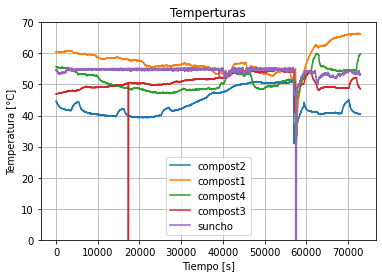

In [9]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/{DATE}/figuras/Temperatura.png")
plt.show()

No handles with labels found to put in legend.


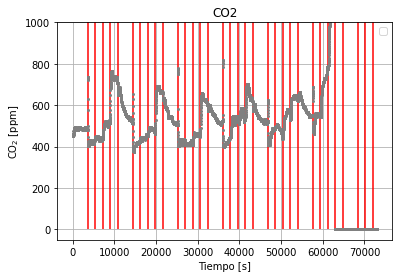

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(-50,1000)
#plt.xlim(0,75000)

plt.savefig(f"{PATH}/{DATE}/figuras/CO2_completo.png")
plt.show()

# Integración

In [11]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
#        inicio.append(pos[i])
        fin.append(pos[i + 1])

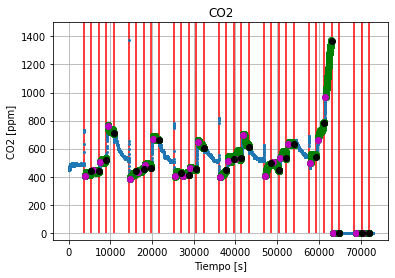

In [16]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

#plt.xlim(175000,200000)
plt.ylim(-50,1500)
#plt.xlim(75000,150000)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)

plt.savefig(f"{PATH}/{DATE}/figuras/areas_pintadas.png")
plt.show()

In [17]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]].astype(float)))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]].astype(float)))

In [18]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [19]:
promedio

[423.2105263157895,
 438.97165991902835,
 513.2793522267207,
 735.0445344129555,
 414.3886639676113,
 445.3238866396761,
 484.56275303643724,
 673.408906882591,
 421.0688259109312,
 416.2348178137652,
 458.5910931174089,
 627.8056680161943,
 423.2631578947368,
 530.9757085020243,
 556.0931174089069,
 656.085020242915,
 468.0769230769231,
 480.582995951417,
 562.5141700404859,
 637.8259109311741,
 550.9635627530364,
 730.4493927125507,
 1182.919028340081,
 0.0,
 0.0,
 0.0]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [ ]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [ ]:
gramos(np.array(promedio))

In [ ]:
from datetime import datetime  
from datetime import timedelta  
  
#Add 1 day  
print(datetime.now() + timedelta(days=1))
  
#Subtract 60 seconds  
print (datetime.now() - timedelta(seconds=60)) 
  
#Add 2 years  
print (datetime.now() + timedelta(days=730) ) 
  
#Other Parameters you can pass in to timedelta:  
# days, seconds, microseconds,   
# milliseconds, minutes, hours, weeks  
  
#Pass multiple parameters (1 day and 5 minutes)  
print (datetime.now() + timedelta(days=1,minutes=5)  )

In [ ]:
DATE

In [ ]:
from datetime import date
date.fromisoformat(f'{DATE[0:10]}')

In [ ]:
datetime.time(f'{DATE[11:]}')

In [ ]:
DATE[11:].replace('"','\\' )

In [ ]:
replace(DATE[0:10],'"','\\"')